# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Read the Data

In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [4]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [5]:
# Pclass ----> Ticket class(1st class, 2nd class..)
# SibSp ----> Siblings
# Parch ----> Parents
# Embarked --> Port of Embarkation(C-Cherbourg, Q-Queenstown, S-Southampton)

In [6]:
set(train.columns).difference(test.columns)

{'Survived'}

# EDA (Exploratory Data Analysis)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
train.shape

(891, 12)

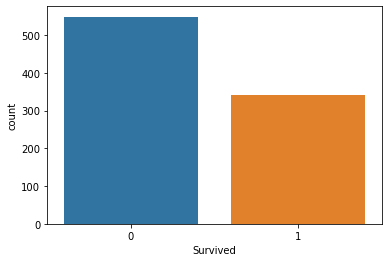

In [11]:
sns.countplot(train['Survived'])
plt.show()

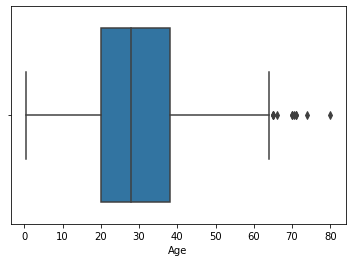

In [12]:
sns.boxplot(train['Age'])
plt.show()

<AxesSubplot:xlabel='Pclass', ylabel='count'>

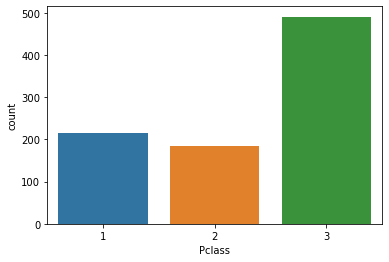

In [13]:
sns.countplot(train['Pclass'])

<AxesSubplot:xlabel='Sex', ylabel='count'>

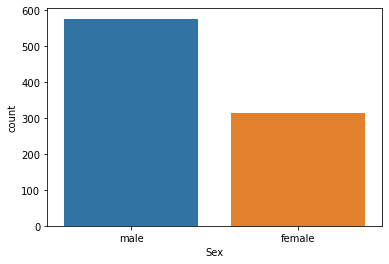

In [14]:
sns.countplot(train['Sex'])

<AxesSubplot:xlabel='SibSp', ylabel='count'>

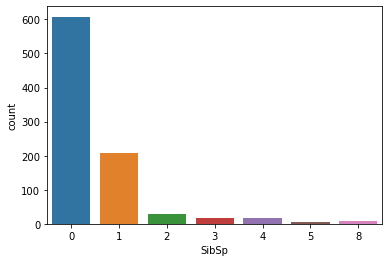

In [15]:
sns.countplot(train['SibSp'])

<AxesSubplot:xlabel='Parch', ylabel='count'>

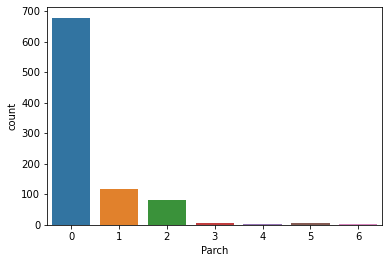

In [16]:
sns.countplot(train['Parch'])

<AxesSubplot:xlabel='Embarked', ylabel='count'>

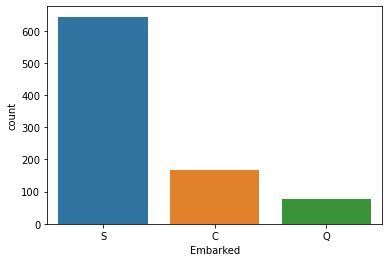

In [17]:
sns.countplot(train['Embarked'])

In [18]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


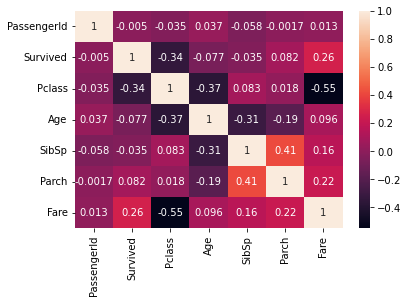

In [19]:
sns.heatmap(data=train.corr(), annot=True)
plt.show()

In [20]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [23]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [24]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [25]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

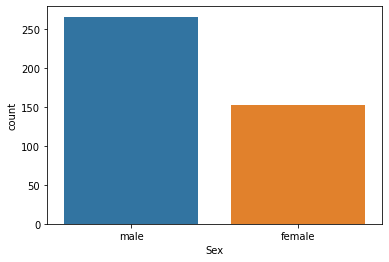

In [26]:
sns.countplot(test['Sex'])
plt.show()

<AxesSubplot:xlabel='Age'>

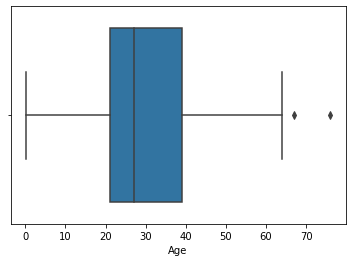

In [35]:
sns.boxplot(test['Age'])

<AxesSubplot:xlabel='Pclass', ylabel='count'>

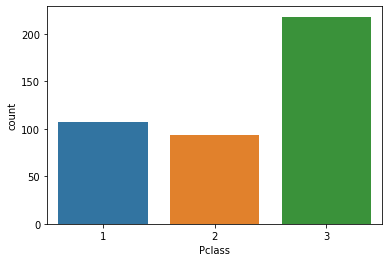

In [34]:
sns.countplot(test['Pclass'])

<AxesSubplot:xlabel='SibSp', ylabel='count'>

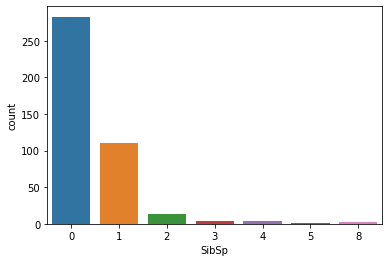

In [33]:
sns.countplot(test['SibSp'])

<AxesSubplot:xlabel='Parch', ylabel='count'>

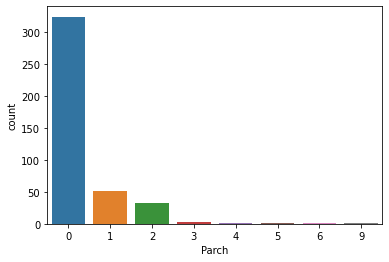

In [32]:
sns.countplot(test['Parch'])

<AxesSubplot:xlabel='Embarked', ylabel='count'>

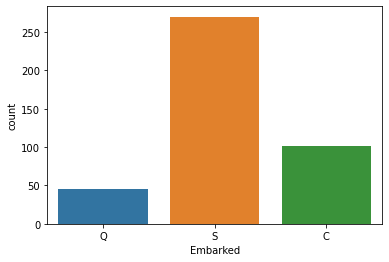

In [37]:
sns.countplot(test['Embarked'])

# Filling Outliers

In [38]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [39]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Cleaning Train Null Values

In [40]:
from sklearn.impute import SimpleImputer

In [41]:
median_imputer = SimpleImputer(strategy="median")
most_frequent_imputer = SimpleImputer(strategy="most_frequent")

In [43]:
train['Age']=pd.DataFrame(median_imputer.fit_transform(train[["Age"]]))
train["Cabin"]=pd.DataFrame(most_frequent_imputer.fit_transform(train[["Cabin"]]))
train["Embarked"]=pd.DataFrame(most_frequent_imputer.fit_transform(train[["Embarked"]]))

In [44]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

# Cleaning Test Null Values

In [46]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [47]:
test['Age']=pd.DataFrame(median_imputer.fit_transform(test[['Age']]))
test['Cabin']=pd.DataFrame(most_frequent_imputer.fit_transform(test[['Cabin']]))
test['Fare']=pd.DataFrame(median_imputer.fit_transform(test[['Fare']]))

In [48]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

# Finding Z Values in train set

In [50]:
train["Age_z_score"] = (train.Age-train.Age.mean())/train.Age.std()

In [51]:
train["Age_z_score"]

0     -0.565419
1      0.663488
2     -0.258192
3      0.433068
4      0.433068
         ...   
886   -0.181385
887   -0.795839
888   -0.104579
889   -0.258192
890    0.202648
Name: Age_z_score, Length: 891, dtype: float64

In [56]:
train[train["Age_z_score"]>3]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_z_score
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C,3.198110
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,B96 B98,Q,3.159706
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,B96 B98,C,3.198110
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S,3.889370
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,B96 B98,S,3.121303
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S,3.121303
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,B96 B98,S,3.428530


In [57]:
train[train["Age_z_score"]<-3]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_z_score


In [58]:
train[(train["Age_z_score"]>3)|(train["Age_z_score"]<-3)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_z_score
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C,3.198110
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,B96 B98,Q,3.159706
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,B96 B98,C,3.198110
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S,3.889370
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,B96 B98,S,3.121303
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S,3.121303
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,B96 B98,S,3.428530


In [60]:
q1 = np.percentile(sorted(train["Age"]),25)
q3 = np.percentile(sorted(train["Age"]),75)

print(q1)
print(q3)

22.0
35.0


In [61]:
iqr = q3-q1
iqr

13.0

Finding lower and Upper Boundaries

In [62]:
lower_boundary = q1-(1.5*(iqr))
upper_boundary = q3+(1.5*(iqr))

print(lower_boundary)
print(upper_boundary)

2.5
54.5


These are Outliers

In [65]:
train[(train["Age"]>upper_boundary)|(train["Age"]<lower_boundary)]
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_z_score
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S,-0.565419
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.663488
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S,-0.258192


In [66]:
from feature_engine.outliers import Winsorizer
win = Winsorizer(capping_method='iqr',tail='both',fold=1.5,variables=["Age"])
Age1 = win.fit_transform(train[["Age"]])

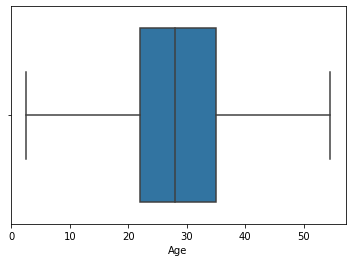

In [67]:
sns.boxplot(Age1.Age)
plt.show()

In [68]:
train["Fare_z_score"] = (train.Fare-train.Fare.mean())/train.Fare.std()

In [69]:
train["Fare_z_score"]

0     -0.502163
1      0.786404
2     -0.488580
3      0.420494
4     -0.486064
         ...   
886   -0.386454
887   -0.044356
888   -0.176164
889   -0.044356
890   -0.492101
Name: Fare_z_score, Length: 891, dtype: float64

In [71]:
train[train["Fare_z_score"]>3]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_z_score,Fare_z_score
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S,-0.795839,4.644393
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S,-0.488612,4.644393
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C,-0.411805,4.332899
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,B96 B98,C,0.433068,9.661740
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C,1.585169,4.332899
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C,-0.872646,4.631815
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S,-0.411805,4.644393
377,378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C,-0.181385,3.608038
380,381,1,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.5250,B96 B98,C,0.970715,3.930516
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S,2.660463,4.644393


In [73]:
train[train["Fare_z_score"]<-3]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_z_score,Fare_z_score


In [75]:
train[(train["Fare_z_score"]>3)|(train["Fare_z_score"]<-3)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_z_score,Fare_z_score
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S,-0.795839,4.644393
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S,-0.488612,4.644393
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C,-0.411805,4.332899
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,B96 B98,C,0.433068,9.661740
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C,1.585169,4.332899
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C,-0.872646,4.631815
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S,-0.411805,4.644393
377,378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C,-0.181385,3.608038
380,381,1,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.5250,B96 B98,C,0.970715,3.930516
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S,2.660463,4.644393


In [76]:
q1 = np.percentile(sorted(train["Fare"]),25)
q3 = np.percentile(sorted(train["Fare"]),75)

print(q1)
print(q3)

7.9104
31.0


In [77]:
iqr = q3-q1
iqr

23.0896

In [78]:
lower_boundary = q1-(1.5*(iqr))
upper_boundary = q3+(1.5*(iqr))

print(lower_boundary)
print(upper_boundary)

-26.724
65.6344


In [81]:
train[(train["Fare"]>upper_boundary)|(train["Fare"]<lower_boundary)]
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_z_score,Fare_z_score
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S,-0.565419,-0.502163
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.663488,0.786404
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S,-0.258192,-0.488580


In [82]:
from feature_engine.outliers import Winsorizer
win = Winsorizer(capping_method='iqr',tail='both',fold=1.5,variables=["Fare"])
Fare1 = win.fit_transform(train[["Fare"]])

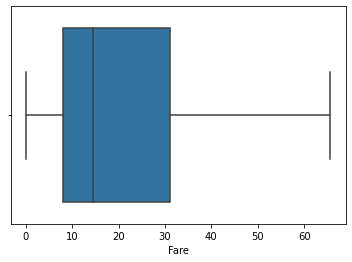

In [83]:
sns.boxplot(Fare1.Fare)
plt.show()

# Finding Z Values in test set

In [85]:
test["Age_z_score"] = (test.Age-train.Age.mean())/test.Age.std()

In [86]:
test["Age_z_score"]

0      0.404480
1      1.388440
2      2.569192
3     -0.185896
4     -0.579480
         ...   
413   -0.185896
414    0.758705
415    0.719347
416   -0.185896
417   -0.185896
Name: Age_z_score, Length: 418, dtype: float64

In [87]:
test[test["Age_z_score"]>3]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_z_score
96,988,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,76.0,1,0,19877,78.85,C46,S,3.671227


In [88]:
test[test["Age_z_score"]<-3]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_z_score


In [89]:
test[(test["Age_z_score"]>3)|(test["Age_z_score"]<-3)]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_z_score
96,988,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,76.0,1,0,19877,78.85,C46,S,3.671227


In [92]:
q1 = np.percentile(sorted(test["Age"]),25)
q3 = np.percentile(sorted(test["Age"]),75)

print(q1)
print(q3)

23.0
35.75


In [93]:
iqr = q3-q1
iqr

12.75

In [94]:
lower_boundary = q1-(1.5*(iqr))
upper_boundary = q3+(1.5*(iqr))

print(lower_boundary)
print(upper_boundary)

3.875
54.875


In [147]:
train[(train["Age"]>upper_boundary)|(train["Age"]<lower_boundary)]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_z_score,Fare_z_score
7,8,0,3,1,2.00,3,1,21.0750,47,2,-2.101553,-0.223957
11,12,1,1,0,58.00,0,0,26.5500,49,2,2.199623,-0.113782
15,16,1,2,0,55.00,0,0,16.0000,47,2,1.969202,-0.326084
16,17,0,3,1,2.00,4,1,29.1250,47,1,-2.101553,-0.061964
33,34,0,2,1,66.00,0,0,10.5000,47,2,2.814076,-0.436762
...,...,...,...,...,...,...,...,...,...,...,...,...
827,828,1,2,1,1.00,0,2,37.0042,47,0,-2.178360,0.096592
829,830,1,1,0,62.00,0,0,80.0000,21,2,2.506849,0.961813
831,832,1,2,1,0.83,1,1,18.7500,47,2,-2.191417,-0.270744
851,852,0,3,1,74.00,0,0,7.7750,47,2,3.428530,-0.491598


In [99]:
from feature_engine.outliers import Winsorizer
win = Winsorizer(capping_method='iqr',tail='both',fold=1.5,variables=["Age"])
Age2 = win.fit_transform(test[["Age"]])

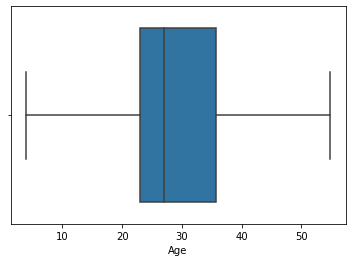

In [100]:
sns.boxplot(Age2.Age)
plt.show()

In [101]:
test["Fare_z_score"] = (test.Fare-train.Fare.mean())/test.Fare.std()

In [102]:
test["Fare_z_score"]

0     -0.436436
1     -0.451283
2     -0.403163
3     -0.421516
4     -0.356610
         ...   
413   -0.432483
414    1.373244
415   -0.446807
416   -0.432483
417   -0.176292
Name: Fare_z_score, Length: 418, dtype: float64

In [103]:
test[test["Fare_z_score"]>3]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_z_score,Fare_z_score
24,916,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,C,1.467156,4.121224
53,945,1,"Fortune, Miss. Ethel Flora",female,28.0,3,2,19950,263.0000,C23 C25 C27,S,-0.107179,4.132415
59,951,1,"Chaudanson, Miss. Victorine",female,36.0,0,0,PC 17608,262.3750,B61,C,0.522555,4.121224
64,956,1,"Ryerson, Master. John Borie",male,13.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C,-1.287931,4.121224
69,961,1,"Fortune, Mrs. Mark (Mary McDougald)",female,60.0,1,4,19950,263.0000,C23 C25 C27,S,2.411758,4.132415
74,966,1,"Geiger, Miss. Amalie",female,35.0,0,0,113503,211.5000,C130,C,0.443838,3.210304
75,967,1,"Keeping, Mr. Edwin",male,32.5,0,0,113503,211.5000,C132,C,0.247046,3.210304
81,973,1,"Straus, Mr. Isidor",male,67.0,1,0,PC 17483,221.7792,C55 C57,S,2.962775,3.394354
114,1006,1,"Straus, Mrs. Isidor (Rosalie Ida Blun)",female,63.0,1,0,PC 17483,221.7792,C55 C57,S,2.647908,3.394354
142,1034,1,"Ryerson, Mr. Arthur Larned",male,61.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,C,2.490475,4.121224


In [104]:
test[test["Fare_z_score"]<-3]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_z_score,Fare_z_score


In [106]:
test[(test["Fare_z_score"]>3)|(test["Fare_z_score"]<-3)]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_z_score,Fare_z_score
24,916,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,C,1.467156,4.121224
53,945,1,"Fortune, Miss. Ethel Flora",female,28.0,3,2,19950,263.0000,C23 C25 C27,S,-0.107179,4.132415
59,951,1,"Chaudanson, Miss. Victorine",female,36.0,0,0,PC 17608,262.3750,B61,C,0.522555,4.121224
64,956,1,"Ryerson, Master. John Borie",male,13.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C,-1.287931,4.121224
69,961,1,"Fortune, Mrs. Mark (Mary McDougald)",female,60.0,1,4,19950,263.0000,C23 C25 C27,S,2.411758,4.132415
74,966,1,"Geiger, Miss. Amalie",female,35.0,0,0,113503,211.5000,C130,C,0.443838,3.210304
75,967,1,"Keeping, Mr. Edwin",male,32.5,0,0,113503,211.5000,C132,C,0.247046,3.210304
81,973,1,"Straus, Mr. Isidor",male,67.0,1,0,PC 17483,221.7792,C55 C57,S,2.962775,3.394354
114,1006,1,"Straus, Mrs. Isidor (Rosalie Ida Blun)",female,63.0,1,0,PC 17483,221.7792,C55 C57,S,2.647908,3.394354
142,1034,1,"Ryerson, Mr. Arthur Larned",male,61.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,C,2.490475,4.121224


In [109]:
q1 = np.percentile(sorted(test["Fare"]),25)
q3 = np.percentile(sorted(test["Fare"]),75)

print(q1)
print(q3)

7.8958
31.471875


In [110]:
iqr = q3-q1
iqr

23.576075

In [111]:
train[(train["Fare"]>upper_boundary)|(train["Fare"]<lower_boundary)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_z_score,Fare_z_score
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.663488,0.786404
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S,-0.795839,4.644393
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,28.0,1,0,PC 17569,146.5208,B78,C,-0.104579,2.300437
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,B96 B98,C,-0.104579,1.005497
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C,1.508362,0.895994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
846,847,0,3,"Sage, Mr. Douglas Bullen",male,28.0,8,2,CA. 2343,69.5500,B96 B98,S,-0.104579,0.751524
849,850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,28.0,1,0,17453,89.1042,C92,C,-0.104579,1.145020
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,B96 B98,S,1.201135,2.669618
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,28.0,8,2,CA. 2343,69.5500,B96 B98,S,-0.104579,0.751524


In [113]:
from feature_engine.outliers import Winsorizer
win = Winsorizer(capping_method='iqr',tail='both',fold=1.5,variables=["Fare"])
Fare2 = win.fit_transform(test[["Fare"]])

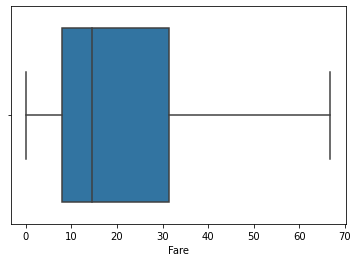

In [114]:
sns.boxplot(Fare2.Fare)
plt.show()

# Label Encoding

In [115]:
from sklearn.preprocessing import LabelEncoder

In [116]:
le = LabelEncoder()

In [119]:
p=["Sex","Cabin","Embarked"]
for i in p:
    train[i]=le.fit_transform(train[i])

In [120]:
p=["Sex","Cabin","Embarked"]
for i in p:
    test[i]=le.fit_transform(test[i])

In [121]:
train=train.drop(columns="Name")

In [122]:
train=train.drop(columns="Ticket")

In [123]:
test=test.drop(columns="Name")

In [124]:
test=test.drop(columns="Ticket")

# Model Building

In [126]:
x = train.drop("Survived",axis=1)

In [128]:
y = train["Survived"]

In [129]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x,y)

LogisticRegression()

In [130]:
model.predict(test)

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [131]:
v = model.predict(test)

In [132]:
test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_z_score,Fare_z_score
0,892,3,1,34.5,0,0,7.8292,15,1,0.404480,-0.436436
1,893,3,0,47.0,1,0,7.0000,15,2,1.388440,-0.451283
2,894,2,1,62.0,0,0,9.6875,15,1,2.569192,-0.403163
3,895,3,1,27.0,0,0,8.6625,15,2,-0.185896,-0.421516
4,896,3,0,22.0,1,1,12.2875,15,2,-0.579480,-0.356610
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,1,27.0,0,0,8.0500,15,2,-0.185896,-0.432483
414,1306,1,0,39.0,0,0,108.9000,22,0,0.758705,1.373244
415,1307,3,1,38.5,0,0,7.2500,15,2,0.719347,-0.446807
416,1308,3,1,27.0,0,0,8.0500,15,2,-0.185896,-0.432483


In [133]:
cv = pd.DataFrame({"PassengerId":test["PassengerId"],"Survived":v})

In [134]:
cv

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [135]:
cv.to_csv("Submission.csv",index=False)

# Evaluation Metrics

In [138]:
model.intercept_

array([0.364978])

In [139]:
model.coef_

array([[ 3.40310778e-04, -5.23030335e-01, -2.62294369e+00,
         4.10337011e-02, -4.28377762e-01, -7.67170102e-02,
         1.16284339e-02,  1.21965749e-02, -1.43608303e-01,
        -8.14887973e-01, -2.34842602e-01]])

In [140]:
train_pred = model.predict(x)

In [141]:
test_pred = model.predict(x)

In [142]:
train_res = y - train_pred

In [143]:
train_res

0      0
1      0
2      0
3      0
4      0
      ..
886    0
887    0
888   -1
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [144]:
test_res = y - test_pred
test_res

0      0
1      0
2      0
3      0
4      0
      ..
886    0
887    0
888   -1
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [146]:
model.score(x,y)

0.8047138047138047